In [82]:
# Alle Variablen löschen ohne zu fragen.
# Hierdurch werden Seiteneffekte vermieden.
%reset -f

In [83]:
# Liste der Variablen ausgeben
%whos       

No variables match your requested type.


In [84]:
%matplotlib notebook

# Laden der verwendeten Bibliotheken
from PIL import Image
import   numpy  as np               
import   scipy 
import   matplotlib                 # https://matplotlib.org/3.1.1/tutorials/index.html
import   matplotlib.pyplot as plt   # https://matplotlib.org/tutorials/introductory/pyplot.html
import   sklearn 
import   skimage
from math import sqrt
from     skimage import data
import   time
from     scipy import signal

In [85]:
# Bild laden mit PIL
imgShaft = Image.open("shaft.bmp")
imgCircle = Image.open("Circle.bmp")
imgVlexmp = Image.open("vlexmp.bmp")
#img = Image.open("boat512.bmp")
#img = Image.open("tasse1.bmp")

In [86]:
print('Installierte Numpy-Version = ', np.__version__)

Installierte Numpy-Version =  1.18.1


In [87]:
# PIL-Image in ein numpy-Array umwandeln
imgShaft2 = np.array(imgShaft)
imgCircle2 = np.array(imgCircle)
imgVlexmp2 = np.array(imgVlexmp)

In [88]:
# in höheren Datentyp umwandeln  (uint8 --> int), damit Ergebnisse nicht beschnitten werden !

srcpicShaft  = np.copy(imgShaft2)
srcpicVlexmp  = np.copy(imgVlexmp2)
srcpicCircle  = np.copy(imgCircle2) # eine echte Kopie anlegen
srcpicShaft  = srcpicShaft.astype(int) # und in den Datentyp int umwandeln
srcpicVlexmp  = srcpicVlexmp.astype(int)
srcpicCircle  = srcpicCircle.astype(int)


In [94]:
def MySoebel(src):
     # Zielbilder anlegen
    gx = np.copy(src)
    gy = np.copy(src)
    g = np.copy(src)
    
    # Größe des Quellbildes bestimmen
    ysize = src.shape[0]
    xsize = src.shape[1]

    print('Bildgröße =', xsize, '/',  ysize)

    src = src.astype(int)
    gx = gx.astype(int)
    gy = gy.astype(int)
    g = g.astype(int)
    
    # Für Grenzwerte prüfen
    x_begin=0
    y_begin=0
    x_end=0
    y_end=0
    maskbound_x = 1
    maskbound_y = 1
    

    
    for y in range(0,ysize):
        for x in range(0,xsize):
            
            #check if out of bounds: it takes the values 
            #indexing from 0 to size-1, so no out of bounds will happen
            if(x-maskbound_x < 0):
                x_begin = 0
            else:
                x_begin = x-maskbound_x
                
            if(y-maskbound_y < 0):
                y_begin = 0
            else:
                y_begin = y-maskbound_y
                
            if(x+maskbound_x > xsize-1):
                x_end = xsize-1
            else:
                x_end = x+maskbound_x
                
            if(y+maskbound_y > ysize-1):
                y_end = ysize-1
            else:
                y_end = y+maskbound_y
            
            # Faltungsmaske in x Richtung
            gx[y][x] = (-2 * src[y][x_begin] + 2 * src[y][x_end] - src[y_begin][x_begin] + src[y_begin][x_end] - src[y_end][x_begin] + src[y_end][x_end])
            
            # Faltungsmake in y Richtung
            gy[y][x] = (-src[y_begin][x_begin] - 2 * src[y_begin][x] - src[y_begin][x_end] + src[y_end][x_begin] + 2 * src[y_end][x] + src[y_end][x_end])
            
    # Betrag des Gradienten        
    g = np.sqrt(gx**2 + gy**2)
    
    # Richtung des Gradienten
    a = np.arctan2(gx, gy) * 180 / np.pi
    
    #Normierung
    g *= (255.0/g.max())
    a *= (360.0/a.max())
    
    return g, a;

Bildgröße = 770 / 498
Runtime   = 2.817s


<IPython.core.display.Javascript object>


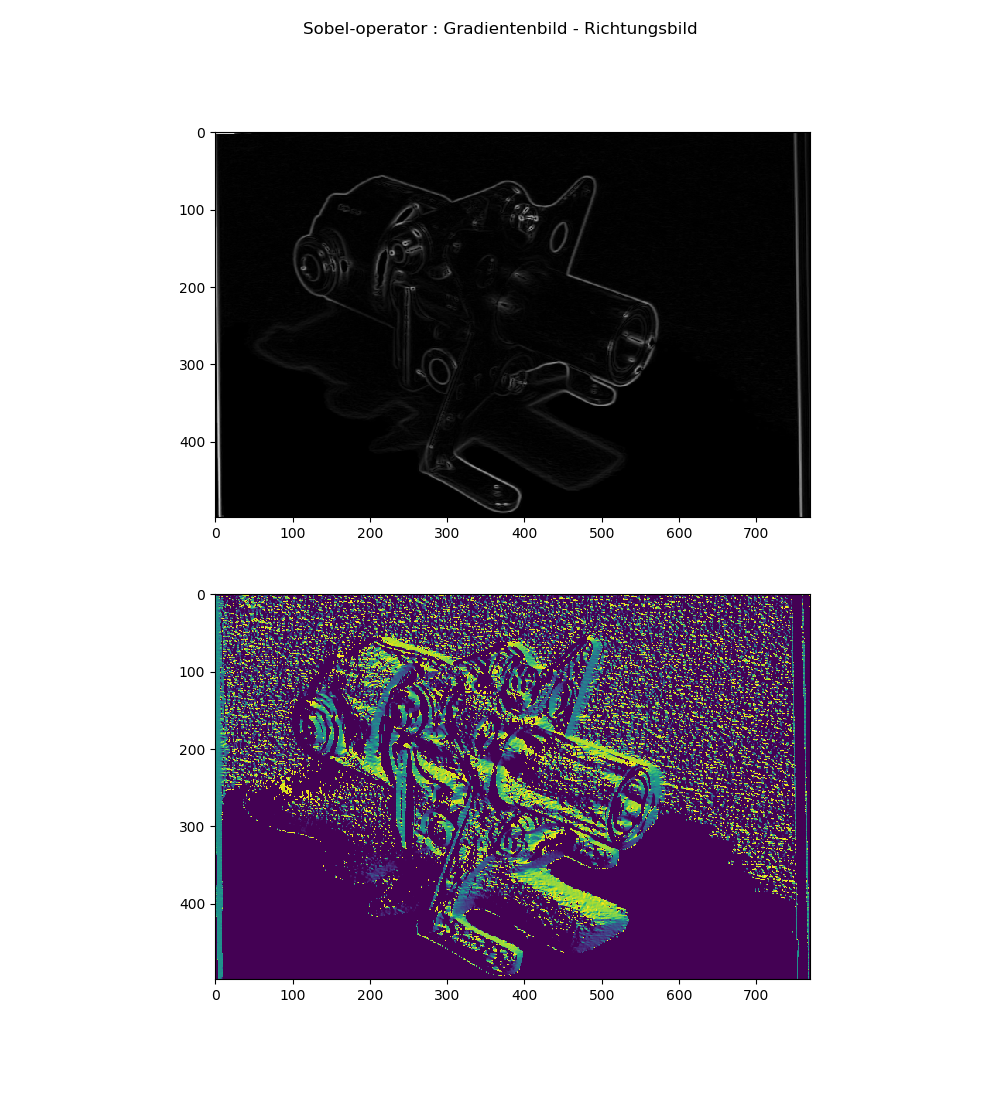

In [95]:
srcpic = srcpicShaft
#srcpic = srcpicCircle
#srcpic = srcpicVlexmp
# Medianoperator aufrufen

start = time.time()
Gradientenbild, Richtungsbild = MySoebel(srcpic)
ende   = time.time()
print('Runtime   = {:5.3f}s'.format(ende-start))

plt.figure(figsize = (10,11))
plt.subplot(211)
plt.imshow(Gradientenbild, cmap='gray', vmin=0, vmax=255)
plt.subplot(212)
plt.imshow(Richtungsbild, vmin=0, vmax=360)
plt.suptitle('Sobel-operator : Gradientenbild - Richtungsbild')
plt.show()

In [20]:
# Liste der Variablen ausgeben
%whos    

Variable     Type            Data/Info
--------------------------------------
Image        module          <module 'PIL.Image' from <...>packages\\PIL\\Image.py'>
MyMedian     function        <function MyMedian at 0x000001BD3B967828>
data         module          <module 'skimage.data' fr<...>mage\\data\\__init__.py'>
img          BmpImageFile    <PIL.BmpImagePlugin.BmpIm<...>770x498 at 0x1BD3A71C888>
img2         ndarray         400x650: 260000 elems, type `uint8`, 260000 bytes (253.90625 kb)
matplotlib   module          <module 'matplotlib' from<...>matplotlib\\__init__.py'>
mw_img       ndarray         400x650: 260000 elems, type `int32`, 1040000 bytes (1015.625 kb)
np           module          <module 'numpy' from 'C:\<...>ges\\numpy\\__init__.py'>
pic          ndarray         400x650: 260000 elems, type `int32`, 1040000 bytes (1015.625 kb)
plt          module          <module 'matplotlib.pyplo<...>\\matplotlib\\pyplot.py'>
region       Image           <PIL.Image.Image image mo<...>